In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot
import random

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
from keras.layers import Convolution2D
from keras.utils import to_categorical

In [3]:
# tf.keras.datasets.mnist.load_data(path="mnist.npz")


## loading the dataset from keras

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [5]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
#constants 
num_classes = 10

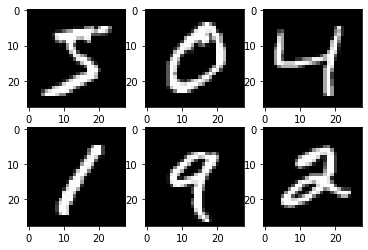

In [8]:
import matplotlib.pyplot as plt 

for i in range(6):
    plt.subplot(int('23' + str(i+1)))
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
        
    

## The Data Preprocessing

The model cant take the image directly we need to grind on some numbers. 

letss see our x_train is of the dimension - 60000*28*28
60000 - is the number of images in the dataset 
28*28 is the height and width of the image. 

x_train has a shape of (60000, 28, 28), where 60000 is the number of training samples, and 28x28 is the size of each image in pixels. However, CNNs expect input data to be in a 4-dimensional tensor with shape (batch_size, height, width, channels).

Therefore, the reshape() method is used to add an additional dimension to x_train, which represents the number of channels in the image. In this case, since the MNIST dataset consists of grayscale images, the number of channels is 1. Hence, the reshaped x_train has a shape of (60000, 28, 28, 1).


### conversion of class vectors to matrices of binary class


In [9]:
# we reshape the dataset so that it can be used for cnn
# we convert the datatype of the x_train to float32
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

#input shape
input_shape = (28,28,1)

#conversion of class vectors to matrices of binary class

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# we are normalizing the data so that neural networks can converg faster
#we want the values of the images to scale from 0 - 1
x_train /= 255
x_test /= 255

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Creation of model

In [11]:
#constans defination

batch_size = 126
num_classes = 10
epochs = 5

#### Sequential()
> creates a sequential model 

#### Conv2D()
>The Conv2D layer performs a convolution operation on the input image using the specified filters. The resulting output is a set of feature maps, each of which corresponds to a specific filter in the layer. The ReLU activation function introduces non-linearity to the output, which is necessary for learning complex patterns in the data.

>In the context of the MNIST dataset, this first convolutional layer is typically used to extract low-level features such as edges, corners, and blobs from the input images. These features are then fed into subsequent layers for higher-level feature extraction and classification.

#### Conv2D(64, (3, 3), activation='relu')
> layer with 64 filters and 3*3 kernal size

#### MaxPooling2D(pool_size=(2, 2))
> spatial dimensions of the feature maps while retaining the most important information. In the context of the MNIST dataset, this layer is typically used to downsample the feature maps output by the previous convolutional layer(s) to half their size in both the height and width dimensions.


#### Dropout()
> This line adds a dropout layer to the model with a rate of 0.25. Dropout is a regularization technique that randomly drops out some of the units in the layer during training to prevent overfitting.

> it randomly sets a fraction (0.25 in this case) of the input units to 0 during training, which forces the model to learn more robust representations of the data that are less dependent on specific input features

> By adding a Dropout layer after the MaxPooling2D layer, the model is encouraged to learn more generalizable features from the downsampled feature maps, rather than memorizing the exact details of the training data. This can improve the model's ability to generalize to new, unseen images and improve its overall accuracy on the task.

#### Flatten()
> This line adds a flattening layer to the model. Flattening converts the output of the previous layer to a 1D vector, which can be passed to a fully connected layer.

#### Dense(256, activation='relu')
> The ReLU activation function introduces non-linearity to the output, which is necessary for learning complex patterns in the data.



### model summary 
>The input layer takes in grayscale images of size 28 x 28 x 1 (one channel for grayscale). The first convolutional layer has 32 filters of size 3 x 3 and uses the ReLU activation function. The output of this layer is passed through another convolutional layer with 64 filters of size 3 x 3, also using the ReLU activation function.

>After the second convolutional layer, a max pooling layer is used to downsample the feature maps by a factor of 2 in both dimensions. This is followed by a dropout layer with a dropout rate of 0.25, which randomly sets a fraction of the input units to zero during training to reduce overfitting.

> The resulting feature maps are then flattened into a 1D vector and passed through a dense layer with 256 units and the ReLU activation function. This is followed by another dropout layer with a dropout rate of 0.5 to further reduce overfitting.

> Finally, the output of the second dropout layer is passed through a dense layer with 10 units and the softmax activation function, which produces a probability distribution over the 10 possible classes (0 to 9). The predicted class for each input image is the class with the highest probability in the output distribution.

In [12]:
def create_model():
    num_classes = 10
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation ='relu',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64,activation = 'relu'))
    model.add(Dense(10, activation= 'softmax'))
    model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    model.summary()
    return model

In [13]:
model = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [14]:
history = model.fit(x_train,y_train,batch_size=200,epochs=10,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Epoch 1/10
300/300 [==============================] - 14s 45ms/step - loss: 0.2900 - accuracy: 0.9079 - val_loss: 0.0660 - val_accuracy: 0.9790
Epoch 2/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 3/10
300/300 [==============================] - 14s 45ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0317 - val_accuracy: 0.9891
Epoch 4/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0267 - val_accuracy: 0.9916
Epoch 5/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0300 - val_accuracy: 0.9897
Epoch 6/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0344 - val_accuracy: 0.9893
Epoch 7/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0268 - val_accuracy:

### Accuracy metrics 

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03077676147222519
Test accuracy: 0.991599977016449


In [16]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


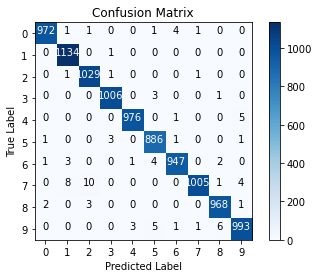

In [17]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.colorbar()

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")
    plt.show()

    # Get predicted labels from model
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from test set
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=list(range(10)))

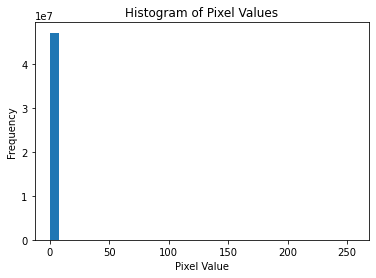

In [18]:
def hist_plot():
    x_train_hist = x_train.reshape((-1, 784))
    x_test_hist = x_test.reshape((-1, 784))
    hist, bins = np.histogram(x_train_hist.flatten(), bins=range(0, 257, 8))
    plt.bar(bins[:-1], hist, width=8, align='edge')
    plt.title("Histogram of Pixel Values")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()
    
hist_plot()

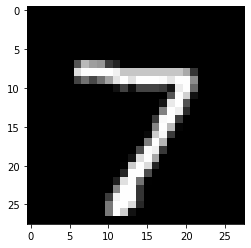

1/1 [==============================] - 0s 105ms/step


C:\Users\Karthik\AppData\Local\Temp\ipykernel_37416\743389597.py:32: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

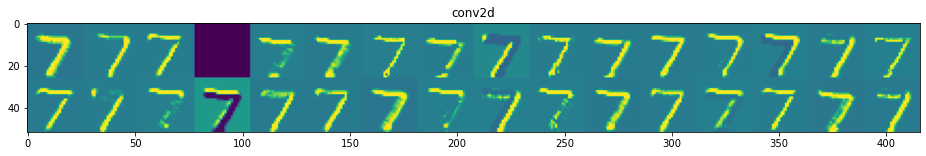

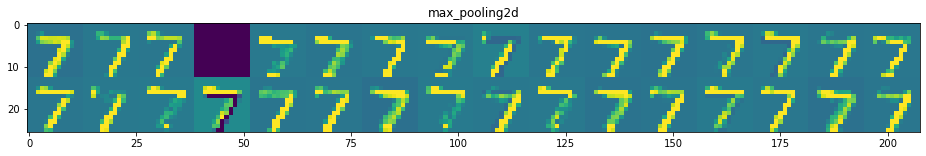

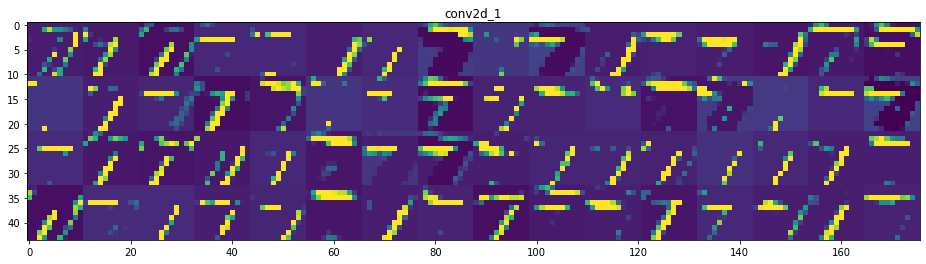

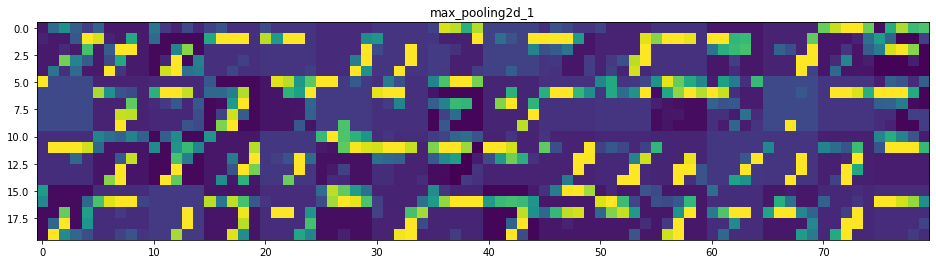

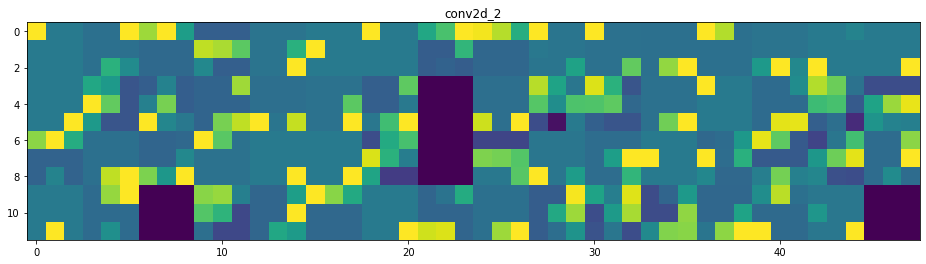

In [19]:
from keras import models

# Choose an image from test dataset and visualize it

img_idx = 0
img = x_test[img_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# Define function to extract layer outputs
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
def get_activations(img, model):
    activations = activation_model.predict(img[np.newaxis, ...])
    return activations

# Generate activation maps for each layer
activations = get_activations(img, activation_model)
layer_names = [layer.name for layer in model.layers]
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


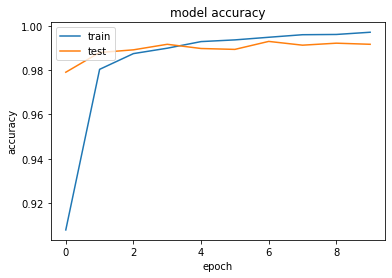

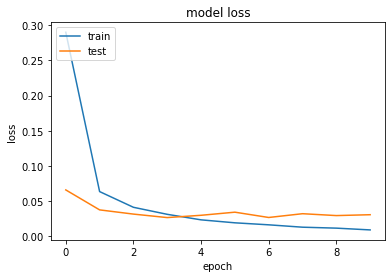

In [21]:
# plot learning curves

print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 [==============================] - 2s 6ms/step


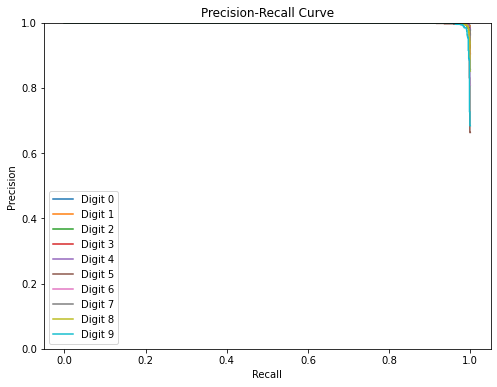

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


# Get predicted probabilities from model
y_pred_prob = model.predict(x_test)

# Get true labels from test set
y_true = np.argmax(y_test, axis=1)

# Initialize empty lists to store precision and recall values
precisions = []
recalls = []
thresholds = []

# Loop through each class and compute precision and recall
for i in range(10):
    y_true_class = (y_true == i)
    y_pred_class = y_pred_prob[:, i]
    precision, recall, threshold = precision_recall_curve(y_true_class, y_pred_class)
    precisions.append(precision)
    recalls.append(recall)
    thresholds.append(threshold)

# Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')

plt.ylabel('Precision')
plt.ylim([0, 1])
for i in range(10):
    plt.plot(recalls[i], precisions[i], label='Digit %d' % i)
plt.legend(loc='lower left')
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

logloss = log_loss(y_test, y_pred)
print("Logarithmic Loss:", logloss)


Mean Squared Error: 0.0013327242
Mean Absolute Error: 0.0020972262
Logarithmic Loss: 0.03077675973583663


### Random testing of the model


1/1 [==============================] - 0s 26ms/step


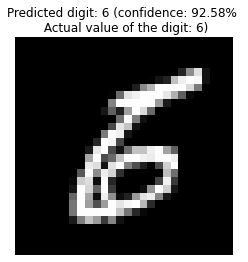

In [25]:
def random_test():
    # Select a random image from the test data
    index = random.randint(0, len(x_test)-1)
    img = x_test[index]
    label = y_test[index]
    digit_label = np.argmax(label, axis=0)  # Convert to array of digits

    
    # Predict the label for the image
    predicted_label = model.predict(np.expand_dims(img, axis=0))[0]
    digit = np.argmax(predicted_label)
    confidence = round(max(predicted_label) * 100, 2)

    # Display the image and predicted label
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title("Predicted digit: {} (confidence: {}% \n Actual value of the digit: {})".format(digit, confidence,digit_label))
    plt.show()

random_test()

In [26]:
from keras.models import load_model
import tkinter as tk
import tkinter.constants as tkconstants  # add this import

import win32gui
from PIL import ImageGrab, Image
import numpy as np

In [ ]:
import tkinter as tk
import tkinter.messagebox as msg
from PIL import ImageGrab,Image,ImageDraw

import numpy as np
from tensorflow.keras.models import load_model

model = load_model('mnist.h5')

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Handwritten Digit Recognition")
        self.geometry("400x400")
        self.configure(background='#E6E6FA')

        # Creating canvas to draw digit
        self.canvas = tk.Canvas(self, width=200, height=200, bg='#FFFFFF', cursor='cross')
        self.canvas.pack(side=tk.TOP, padx=5, pady=5)

        # Adding labels and buttons
        self.label = tk.Label(self, text="Draw a digit in the box below", font=("Arial Bold", 16), bg='#E6E6FA')
        self.label.pack(side=tk.TOP, padx=5, pady=5)

        self.classify_button = tk.Button(self, text="Predict", font=("Arial Bold", 14), command=self.classify_handwriting, bg='#4CAF50', fg='#FFFFFF')
        self.classify_button.pack(side=tk.LEFT, padx=5, pady=5)

        self.clear_button = tk.Button(self, text="Clear", font=("Arial Bold", 14), command=self.clear_all, bg='#FFA500', fg='#FFFFFF')
        self.clear_button.pack(side=tk.RIGHT, padx=5, pady=5)

        # Bind mouse events to canvas
        self.canvas.bind("<Button-1>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

        # Initialize x and y
        self.x = None
        self.y = None

        # Create PIL image to hold the drawn digit
        self.image = Image.new("L", (200, 200), 255)

    def clear_all(self):
        self.canvas.delete("all")
        self.label.configure(text="Draw a digit in the box below")
        self.image = Image.new("L", (200, 200), 255)

    def classify_handwriting(self):
        if not np.any(np.array(self.image)):
            msg.showwarning("Warning", "Please draw a digit first!")
            return

        img = self.image.resize((28, 28))
        img = np.array(img)
        img = img.astype('float32')
        img = (255 - img) / 255.0
        img = img.reshape(-1, 28, 28, 1)

        res = model.predict([img])[0]
        digit = np.argmax(res)
        confidence = round(max(res) * 100, 2)

        self.label.configure(text=f"The predicted digit is {digit} with {confidence}% confidence")

    def start_pos(self, event):
        self.x = event.x
        self.y = event.y

    def draw_lines(self, event):
        if self.x and self.y:
            x2, y2 = event.x, event.y
            self.canvas.create_line(self.x, self.y, x2, y2, width=16, fill='black', capstyle=tk.ROUND, smooth=True)

            # Draw the same line on PIL image
            draw = ImageDraw.Draw(self.image)
            draw.line((self.x, self.y, x2, y2), width=16, fill='black')

            self.x = x2
            self.y = y2

# Create the GUI instance and run the mainloop
app = App()
app.mainloop()


1/1 [==============================] - 0s 10ms/step
